<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JersonDavidPerezContreras/blob/main/Actividad_Semanal_6%2C_visualizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# TECNOLOGICO DE MONTEREY





#Maestria en inteligencia artificial aplicada





##Ciencia y Analitica de datos





## Profesora:

María de la Paz Rico Fernández





# Presentado por: 

Jerson David Perez Contreras

A01793810



In [25]:
# lIBRERIAS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA


from sklearn import preprocessing

import seaborn as sns   # Con la ayuda de seaborn podemos hacer una grafica mas facil de entender de correlaciónn

##1. Descarga los datosEnlaces a un sitio externo. y carga el dataset en tu libreta.


df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv')
col_names = ['ID', 'Amount_Credit', 'Gender', 'Education', 'Marital_status', 'Age', 'Repayment_status_September', 'Repayment_status_August', 
       'Repayment_status_July', 'Repayment_status_June', 'Repayment_status_May', 'Repayment_status_April','Amount_bill_statement_September_2005',
        'Amount_bill_statement_August_2005', 'Amount_bill_statement_July_2005', 'Amount_bill_statement_June_2005', 'Amount_bill_statement_May_2005',
        'Amount_bill_statement_April_2005','Amount_paid_September_2005', 'Amount_paid_August_2005', 'Amount_paid_July_2005', 'Amount_paid_June_2005', 
        'Amount_paid_May_2005','Amount_paid_April_2005', 'y']
df.columns = col_names

df.head()

,ID,Amount_Credit,Gender,Education,Marital_status,Age,Repayment_status_September,Repayment_status_August,Repayment_status_July,Repayment_status_June,...,Amount_bill_statement_June_2005,Amount_bill_statement_May_2005,Amount_bill_statement_April_2005,Amount_paid_September_2005,Amount_paid_August_2005,Amount_paid_July_2005,Amount_paid_June_2005,Amount_paid_May_2005,Amount_paid_April_2005,y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [2]:
## 2.  Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

print( "Tamaño de Data: ")
print(df.shape) ## tiene 30000 observaciones con 25 variables
print( "\n")
print( "Columnas: ")
print( df.columns)

print( "\n")
print( "Encabezado Datos: ")
print( df.head())

Tamaño de Data: 
(30000, 25)


Columnas: 
Index(['ID', 'Amount_Credit', 'Gender', 'Education', 'Marital_status', 'Age',
       'Repayment_status_September', 'Repayment_status_August',
       'Repayment_status_July', 'Repayment_status_June',
       'Repayment_status_May', 'Repayment_status_April',
       'Amount_bill_statement_September_2005',
       'Amount_bill_statement_August_2005', 'Amount_bill_statement_July_2005',
       'Amount_bill_statement_June_2005', 'Amount_bill_statement_May_2005',
       'Amount_bill_statement_April_2005', 'Amount_paid_September_2005',
       'Amount_paid_August_2005', 'Amount_paid_July_2005',
       'Amount_paid_June_2005', 'Amount_paid_May_2005',
       'Amount_paid_April_2005', 'y'],
      dtype='object')


Encabezado Datos: 
   ID  Amount_Credit  Gender  Education  Marital_status   Age  \
0   1          20000     2.0        2.0             1.0  24.0   
1   2         120000     2.0        2.0             2.0  26.0   
2   3          90000     2.0       

In [3]:
print( "Tipos de variables: ")
print(df.dtypes)


Tipos de variables: 
ID                                        int64
Amount_Credit                             int64
Gender                                  float64
Education                               float64
Marital_status                          float64
Age                                     float64
Repayment_status_September              float64
Repayment_status_August                 float64
Repayment_status_July                   float64
Repayment_status_June                   float64
Repayment_status_May                    float64
Repayment_status_April                  float64
Amount_bill_statement_September_2005    float64
Amount_bill_statement_August_2005       float64
Amount_bill_statement_July_2005         float64
Amount_bill_statement_June_2005         float64
Amount_bill_statement_May_2005          float64
Amount_bill_statement_April_2005        float64
Amount_paid_September_2005              float64
Amount_paid_August_2005                 float64
Amount_paid_July_20

In [4]:
print( "Detalle de variables: ")

df.info()

Detalle de variables: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    30000 non-null  int64  
 1   Amount_Credit                         30000 non-null  int64  
 2   Gender                                29999 non-null  float64
 3   Education                             29998 non-null  float64
 4   Marital_status                        29998 non-null  float64
 5   Age                                   29995 non-null  float64
 6   Repayment_status_September            29997 non-null  float64
 7   Repayment_status_August               29995 non-null  float64
 8   Repayment_status_July                 29993 non-null  float64
 9   Repayment_status_June                 29991 non-null  float64
 10  Repayment_status_May                  29984 non-null  float

In [5]:
print( "Contiene nulos?: ")

df.isna().any()  ## PODEMOS OBSERVAR QUE SI EXISTEB VALORES  NA EN LAS DIFERENTES CAMPOS

Contiene nulos?: 


ID                                      False
Amount_Credit                           False
Gender                                   True
Education                                True
Marital_status                           True
Age                                      True
Repayment_status_September               True
Repayment_status_August                  True
Repayment_status_July                    True
Repayment_status_June                    True
Repayment_status_May                     True
Repayment_status_April                   True
Amount_bill_statement_September_2005     True
Amount_bill_statement_August_2005        True
Amount_bill_statement_July_2005          True
Amount_bill_statement_June_2005          True
Amount_bill_statement_May_2005           True
Amount_bill_statement_April_2005         True
Amount_paid_September_2005               True
Amount_paid_August_2005                  True
Amount_paid_July_2005                    True
Amount_paid_June_2005             

In [6]:
## 3.  Limpia los datos eliminando los registros nulos o rellena con la media de la columna


(df.isna().sum()/df.shape[0])*100## Observar cuantos datos hay nulos

ID                                      0.000000
Amount_Credit                           0.000000
Gender                                  0.003333
Education                               0.006667
Marital_status                          0.006667
Age                                     0.016667
Repayment_status_September              0.010000
Repayment_status_August                 0.016667
Repayment_status_July                   0.023333
Repayment_status_June                   0.030000
Repayment_status_May                    0.053333
Repayment_status_April                  0.046667
Amount_bill_statement_September_2005    0.036667
Amount_bill_statement_August_2005       0.036667
Amount_bill_statement_July_2005         0.043333
Amount_bill_statement_June_2005         0.050000
Amount_bill_statement_May_2005          0.056667
Amount_bill_statement_April_2005        0.033333
Amount_paid_September_2005              0.026667
Amount_paid_August_2005                 0.030000
Amount_paid_July_200

In [7]:
#Los datos  nulos no pesan mas del 1% por tal motivo se escoge la eliminacion de estoas datos
df.dropna(inplace=True)
(df.isna().sum()/df.shape[0])*100  ## Observar cuantos datos hay nulos

ID                                      0.0
Amount_Credit                           0.0
Gender                                  0.0
Education                               0.0
Marital_status                          0.0
Age                                     0.0
Repayment_status_September              0.0
Repayment_status_August                 0.0
Repayment_status_July                   0.0
Repayment_status_June                   0.0
Repayment_status_May                    0.0
Repayment_status_April                  0.0
Amount_bill_statement_September_2005    0.0
Amount_bill_statement_August_2005       0.0
Amount_bill_statement_July_2005         0.0
Amount_bill_statement_June_2005         0.0
Amount_bill_statement_May_2005          0.0
Amount_bill_statement_April_2005        0.0
Amount_paid_September_2005              0.0
Amount_paid_August_2005                 0.0
Amount_paid_July_2005                   0.0
Amount_paid_June_2005                   0.0
Amount_paid_May_2005            

In [8]:
## Ya no existes datos nulos o vacios

## 4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

df.describe()

,ID,Amount_Credit,Gender,Education,Marital_status,Age,Repayment_status_September,Repayment_status_August,Repayment_status_July,Repayment_status_June,...,Amount_bill_statement_June_2005,Amount_bill_statement_May_2005,Amount_bill_statement_April_2005,Amount_paid_September_2005,Amount_paid_August_2005,Amount_paid_July_2005,Amount_paid_June_2005,Amount_paid_May_2005,Amount_paid_April_2005,y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,15005.550504,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,8654.547473,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7516.250000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,15005.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22497.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


Describe nos sirve para mirar un detalle estadisticos de cada columna, en esta momento se observa que todas las columnas tiene 29958 observacione, esto debido a que ya se realizo una limpieza de datos. Entre los datos descritivos podemos encontrar el promedio, su desviación, el minimo y el maximo y los percentiles 25,50 y 75.
Estos valores nos permite conocer la naturaleza de los datos y su comportamiento, por ejemplo la edad tiene un rango entre los 21 y 79 años, con un promedio de 35 años, Tambien vemos como las variables categoricas no presentan datos estadisticos muy legibles, pero en el caso del genero se puede concluir que mas del 50% son mujeres al estar presentes en el persentil 50 y 75 y su media pasa por encima de 1,5 tendiendo a 2.


In [16]:
## 5. Realiza el conteo de las variables categóricas

# al revisar las variabels se denotan que las primeras 9 variables son categoriacas, 
# las primeras para el genero, eduacion y estado civil, y las demas para el historial de pago
# donde se establecen categorias del 1 al 8 segun el nivel de inpago

# Variables para categorias

variables_categoricas = [ 'Gender', 'Education', 'Marital_status', 'Repayment_status_September', 'Repayment_status_August', 
       'Repayment_status_July', 'Repayment_status_June', 'Repayment_status_May', 'Repayment_status_April']

## Establecemos las demas varaibles

variables_numericas = ['Amount_Credit', 'Age', 'Amount_bill_statement_September_2005',
        'Amount_bill_statement_August_2005', 'Amount_bill_statement_July_2005', 'Amount_bill_statement_June_2005', 'Amount_bill_statement_May_2005',
        'Amount_bill_statement_April_2005','Amount_paid_September_2005', 'Amount_paid_August_2005', 'Amount_paid_July_2005', 'Amount_paid_June_2005', 
        'Amount_paid_May_2005','Amount_paid_April_2005']




In [22]:
# 6 Escala los datos, si consideras necesario

# para un mejor analicis es nesesario escalar la cantidad de pago que son valores siginificantes
# para ello se utilizara la tecnica de  MinMaxScaler con valores del 0-1

minMaxScaler = MinMaxScaler(feature_range=(0,1))
df_tranform = minMaxScaler.fit_transform(df[variables_numericas])
df_tranform = pd.DataFrame(df_tranform, columns=variables_numericas)
df_tranform = pd.concat([df[variables_categoricas],df_tranform,df['y']], axis=1)
df_tranform.head()


,Gender,Education,Marital_status,Repayment_status_September,Repayment_status_August,Repayment_status_July,Repayment_status_June,Repayment_status_May,Repayment_status_April,Amount_Credit,...,Amount_bill_statement_June_2005,Amount_bill_statement_May_2005,Amount_bill_statement_April_2005,Amount_paid_September_2005,Amount_paid_August_2005,Amount_paid_July_2005,Amount_paid_June_2005,Amount_paid_May_2005,Amount_paid_April_2005,y
0,2.0,2.0,1.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,0.010101,...,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1.0
1,2.0,2.0,2.0,-1.0,2.0,0.0,0.0,0.0,2.0,0.111111,...,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1.0
2,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080808,...,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0.0
3,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040404,...,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0.0
4,1.0,2.0,1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.040404,...,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0.0


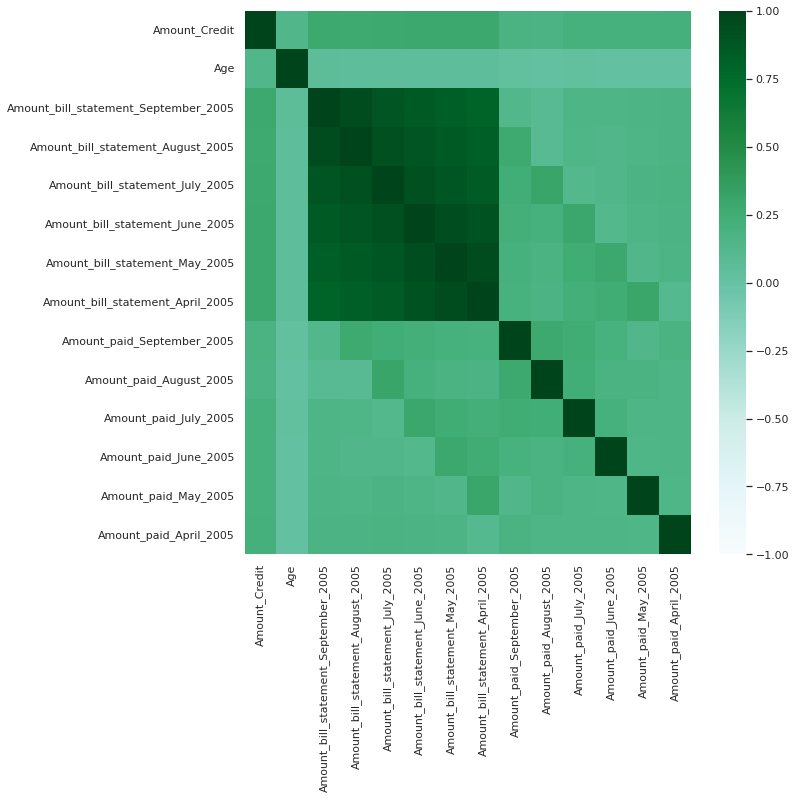

In [27]:
#7. Reduce las dimensiones con PCA, si consideras necesario.
##  Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%
##  Indica la importancia de las variables en cada componente

df_analisis = df_tranform[variables_numericas]  #Tomamos las variables numericas para realizar una reduccion


sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(df_analisis.corr(),vmin = -1, vmax = 1, cmap = "BuGn") ## Revisemos la correlaciones entre las variables

In [28]:
## Vemos que hay múltiples variables que están muy correlacionadas positivamente que nos da un inicio de variables que pueden generar duplicidad de la información 

## para obtener un data mas normalizada aplicamos las funcionalidades de la librería PCA y Scale de skarlearn

pcs = PCA() 
pcs.fit(preprocessing.scale(df_analisis.dropna(axis=0)))

PCA()

In [29]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.4329,1.3099,1.0223,0.9619,0.9401,0.9342,0.8830,0.8524,0.8410,0.5142,0.2665,0.2026,0.1592,0.1525
Proportion of variance,0.4228,0.1226,0.0746,0.0661,0.0631,0.0623,0.0557,0.0519,0.0505,0.0189,0.0051,0.0029,0.0018,0.0017
Cumulative proportion,0.4228,0.5453,0.6200,0.6861,0.7492,0.8115,0.8672,0.9191,0.9696,0.9885,0.9936,0.9965,0.9983,1.0000


In [ ]:
## dado la cumulative proporción y bajo el criterio del 70% de la varianza, observamos que son 5 los componentes que explican el 74.9% de la información

In [30]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=df_analisis.columns
                                )


pcsComponents_df.iloc[:,:6]  # a partir de los datos nos permite ver cuales variables correspondes
# a los componentes seleccionados, para ellos entre un mayor valor absoluto, la variable representa más al componente

,PC1,PC2,PC3,PC4,PC5,PC6
Amount_Credit,0.165507,0.300709,-0.378575,-0.200103,0.035312,-0.078883
Age,0.032789,0.071906,-0.869471,0.338990,-0.039760,0.071461
Amount_bill_statement_September_2005,0.372446,-0.190793,-0.034207,-0.063899,0.041391,-0.043987
Amount_bill_statement_August_2005,0.383253,-0.174644,-0.001814,0.007629,0.083164,-0.028824
Amount_bill_statement_July_2005,0.388264,-0.126883,0.034747,0.060528,0.113790,0.099239
Amount_bill_statement_June_2005,0.391557,-0.120403,0.034073,0.074774,0.028378,0.014527
Amount_bill_statement_May_2005,0.388505,-0.105928,0.033882,0.039553,-0.106756,-0.099290
Amount_bill_statement_April_2005,0.380672,-0.094157,0.018489,-0.070616,-0.164986,0.069272
Amount_paid_September_2005,0.135120,0.383194,0.173845,0.362055,0.225652,0.040574
Amount_paid_August_2005,0.116768,0.408391,0.200925,0.345745,0.148714,0.408361


In [31]:
## Variables importantes en cada componente
print( " Max Variables  PC1 :" ) 
print( pcsComponents_df.PC1.nlargest(3))
print( " \n" ) 
print( " Max Variables  PC2 :" ) 
print( pcsComponents_df.PC2.nlargest(3))
print( " \n" ) 
print( " Max Variables  PC3 :" ) 
print( pcsComponents_df.PC3.nlargest(3))
print( " \n" ) 
print( " Max Variables  PC4 :" ) 
print( pcsComponents_df.PC4.nlargest(3))
print( " \n" ) 
print( " Max Variables  PC5 :" ) 
print( pcsComponents_df.PC5.nlargest(3))

 Max Variables  PC1 :
Amount_bill_statement_June_2005    0.391557
Amount_bill_statement_May_2005     0.388505
Amount_bill_statement_July_2005    0.388264
Name: PC1, dtype: float64
 

 Max Variables  PC2 :
Amount_paid_August_2005       0.408391
Amount_paid_July_2005         0.392339
Amount_paid_September_2005    0.383194
Name: PC2, dtype: float64
 

 Max Variables  PC3 :
Amount_paid_August_2005       0.200925
Amount_paid_September_2005    0.173845
Amount_paid_July_2005         0.122065
Name: PC3, dtype: float64
 

 Max Variables  PC4 :
Amount_paid_September_2005    0.362055
Amount_paid_August_2005       0.345745
Age                           0.338990
Name: PC4, dtype: float64
 

 Max Variables  PC5 :
Amount_paid_April_2005        0.659155
Amount_paid_September_2005    0.225652
Amount_paid_August_2005       0.148714
Name: PC5, dtype: float64


In [35]:
variables_all = [ 'Amount_Credit', 'Gender', 'Education', 'Marital_status', 'Age', 'Repayment_status_September', 'Repayment_status_August', 
       'Repayment_status_July', 'Repayment_status_June', 'Repayment_status_May', 'Repayment_status_April','Amount_bill_statement_September_2005',
        'Amount_bill_statement_August_2005', 'Amount_bill_statement_July_2005', 'Amount_bill_statement_June_2005', 'Amount_bill_statement_May_2005',
        'Amount_bill_statement_April_2005','Amount_paid_September_2005', 'Amount_paid_August_2005', 'Amount_paid_July_2005', 'Amount_paid_June_2005', 
        'Amount_paid_May_2005','Amount_paid_April_2005', 'y']


24

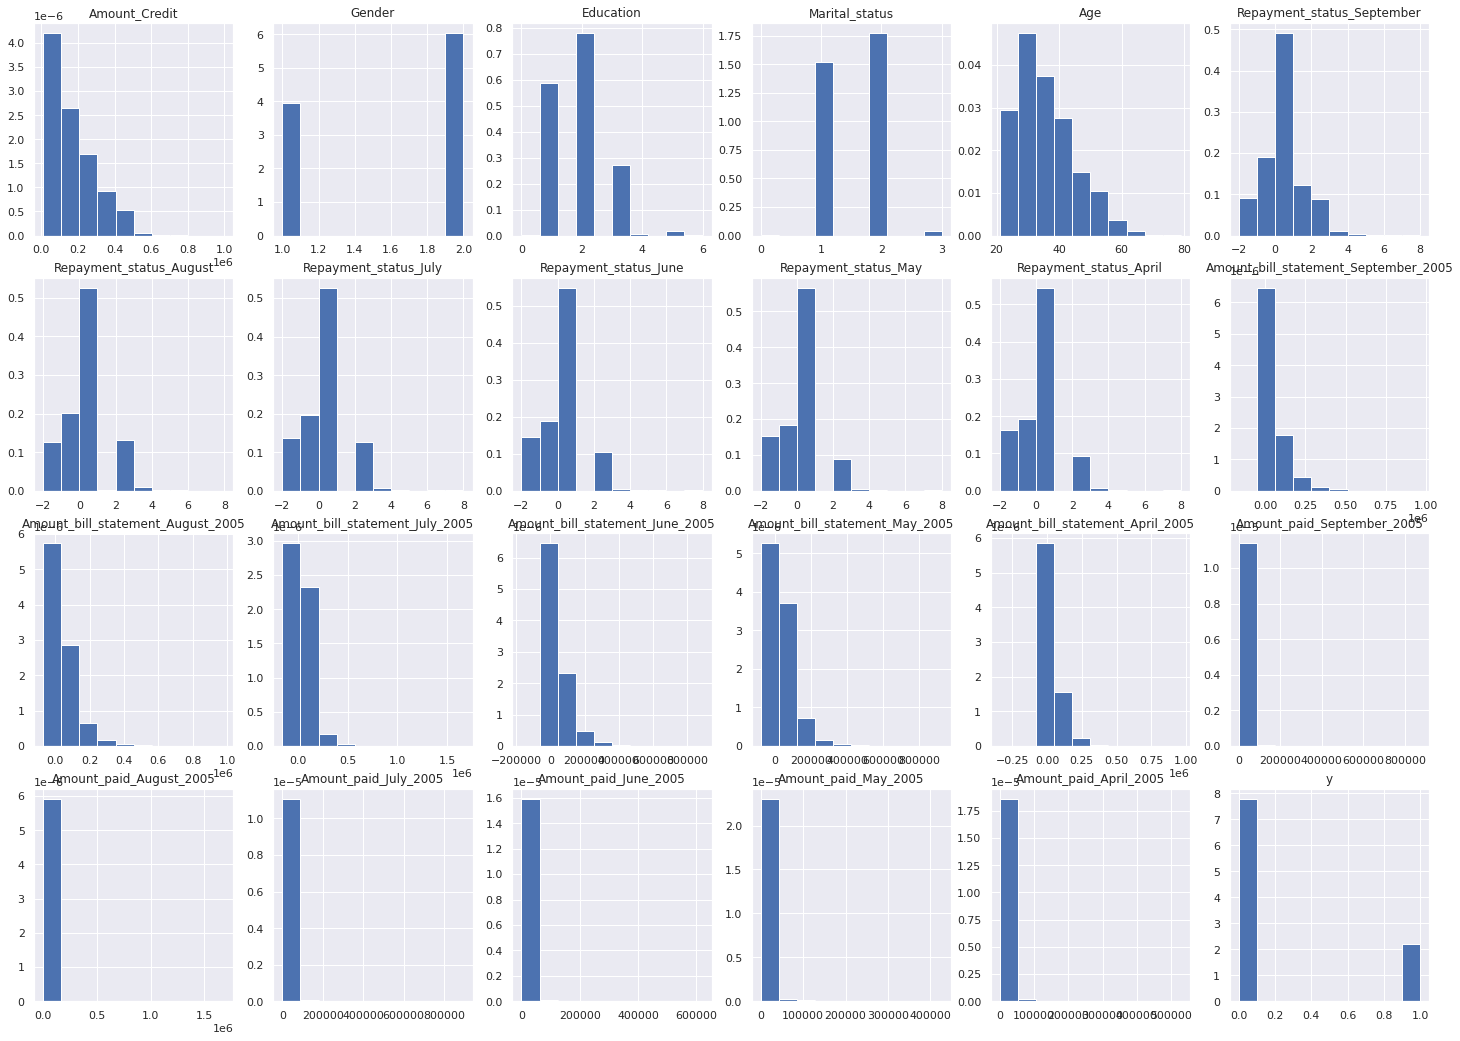

In [36]:
# 8. Elabora los histogramas de los atributos para visualizar su distribución


fig, axs = plt.subplots(4, 6, figsize=(25, 18))

for i in range(0,6):
    plt.subplot(4, 6, i+1)
    plt.hist(df[variables_all[i]], density=True)
    plt.title(variables_all[i])
    
    plt.subplot(4, 6, i+7)
    plt.hist(df[variables_all[i+6]], density=True)
    plt.title(variables_all[i+6])
    
    plt.subplot(4, 6, i+13)
    plt.hist(df[variables_all[i+12]], density=True)
    plt.title(variables_all[i+12])
    
    plt.subplot(4, 6, i+19)
    plt.hist(df[variables_all[i+18]], density=True)
    plt.title(variables_all[i+18])

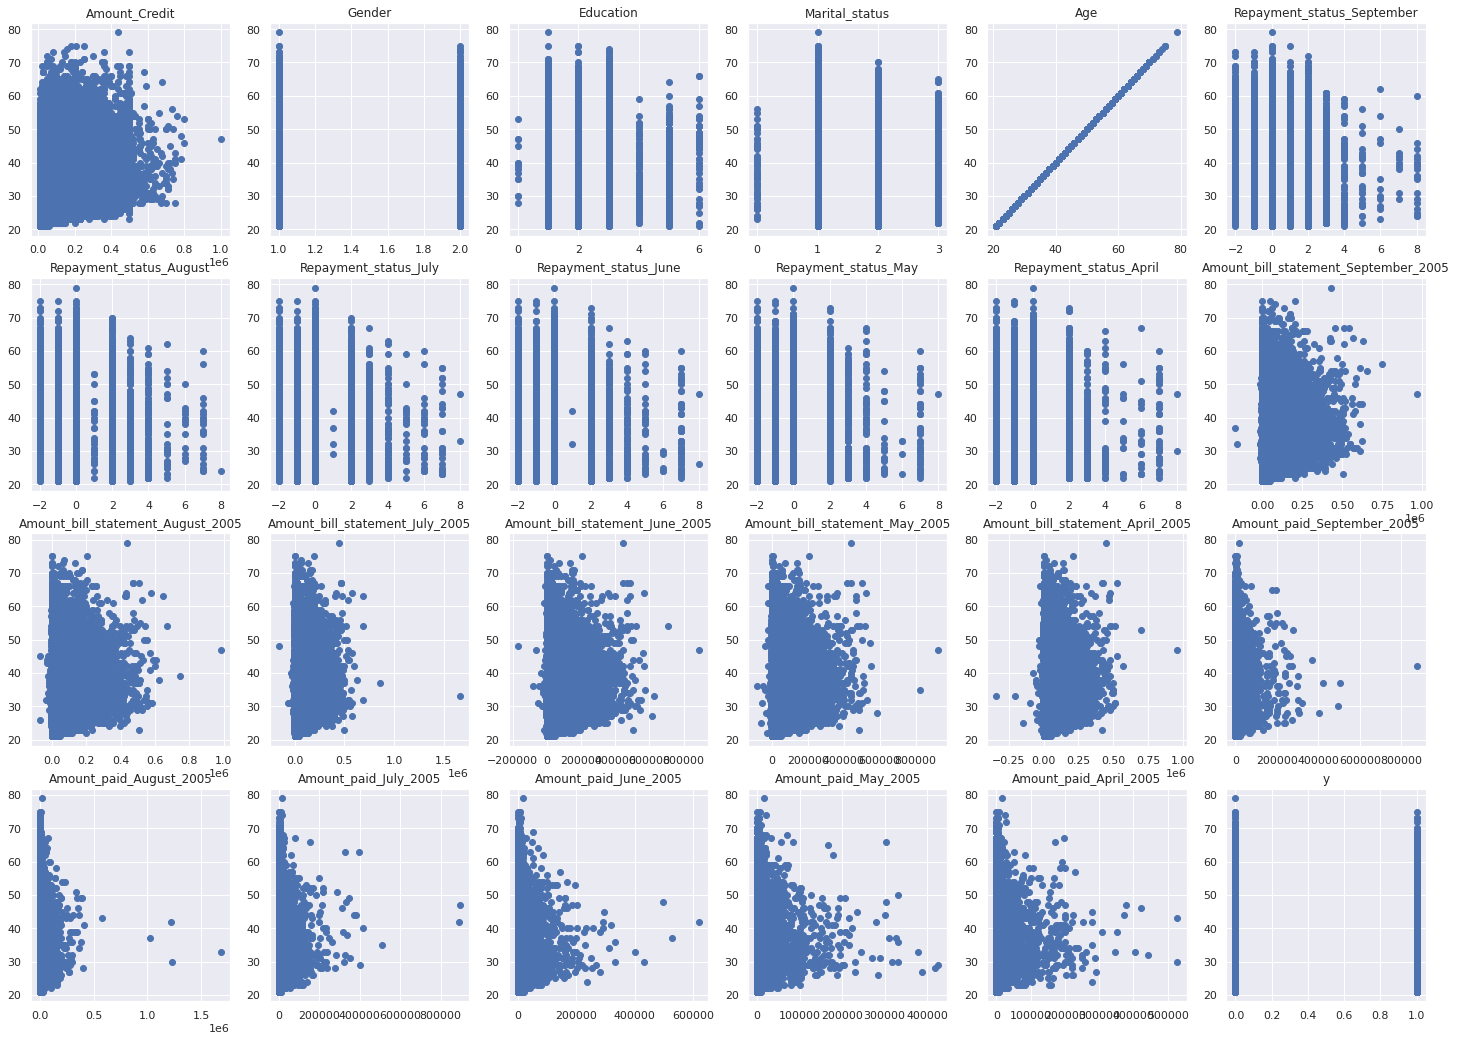

In [40]:
#Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: 
#plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

# Dispersion vs edad


fig, axs = plt.subplots(4, 6, figsize=(25, 18))

for i in range(0,6):
    plt.subplot(4, 6, i+1)
    plt.scatter(df[variables_all[i]], df['Age'])
    plt.title(variables_all[i])
    
    plt.subplot(4, 6, i+7)
    plt.scatter(df[variables_all[i+6]], df['Age'])
    plt.title(variables_all[i+6])
    
    plt.subplot(4, 6, i+13)
    plt.scatter(df[variables_all[i+12]], df['Age'])
    plt.title(variables_all[i+12])
    
    plt.subplot(4, 6, i+19)
    plt.scatter(df[variables_all[i+18]], df['Age'])
    plt.title(variables_all[i+18])

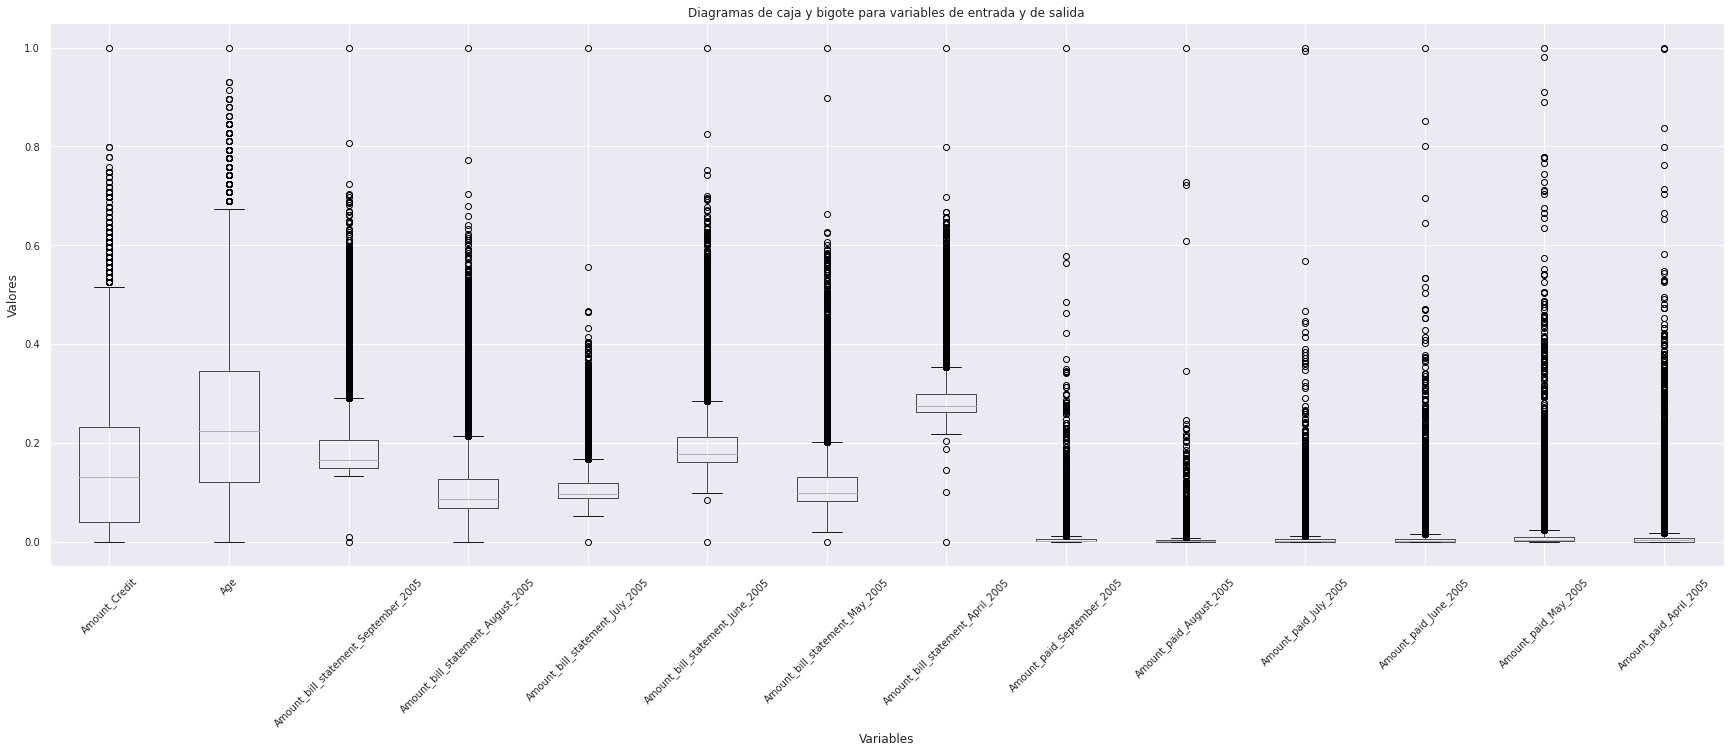

In [45]:
# caja de bigotes, variables numericas
fig, ax2 = plt.subplots(figsize=(30,10))
df_tranform[variables_numericas].boxplot(rot=45,fontsize = 10) 
plt.title('Diagramas de caja y bigote para variables de entrada y de salida')
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.show()



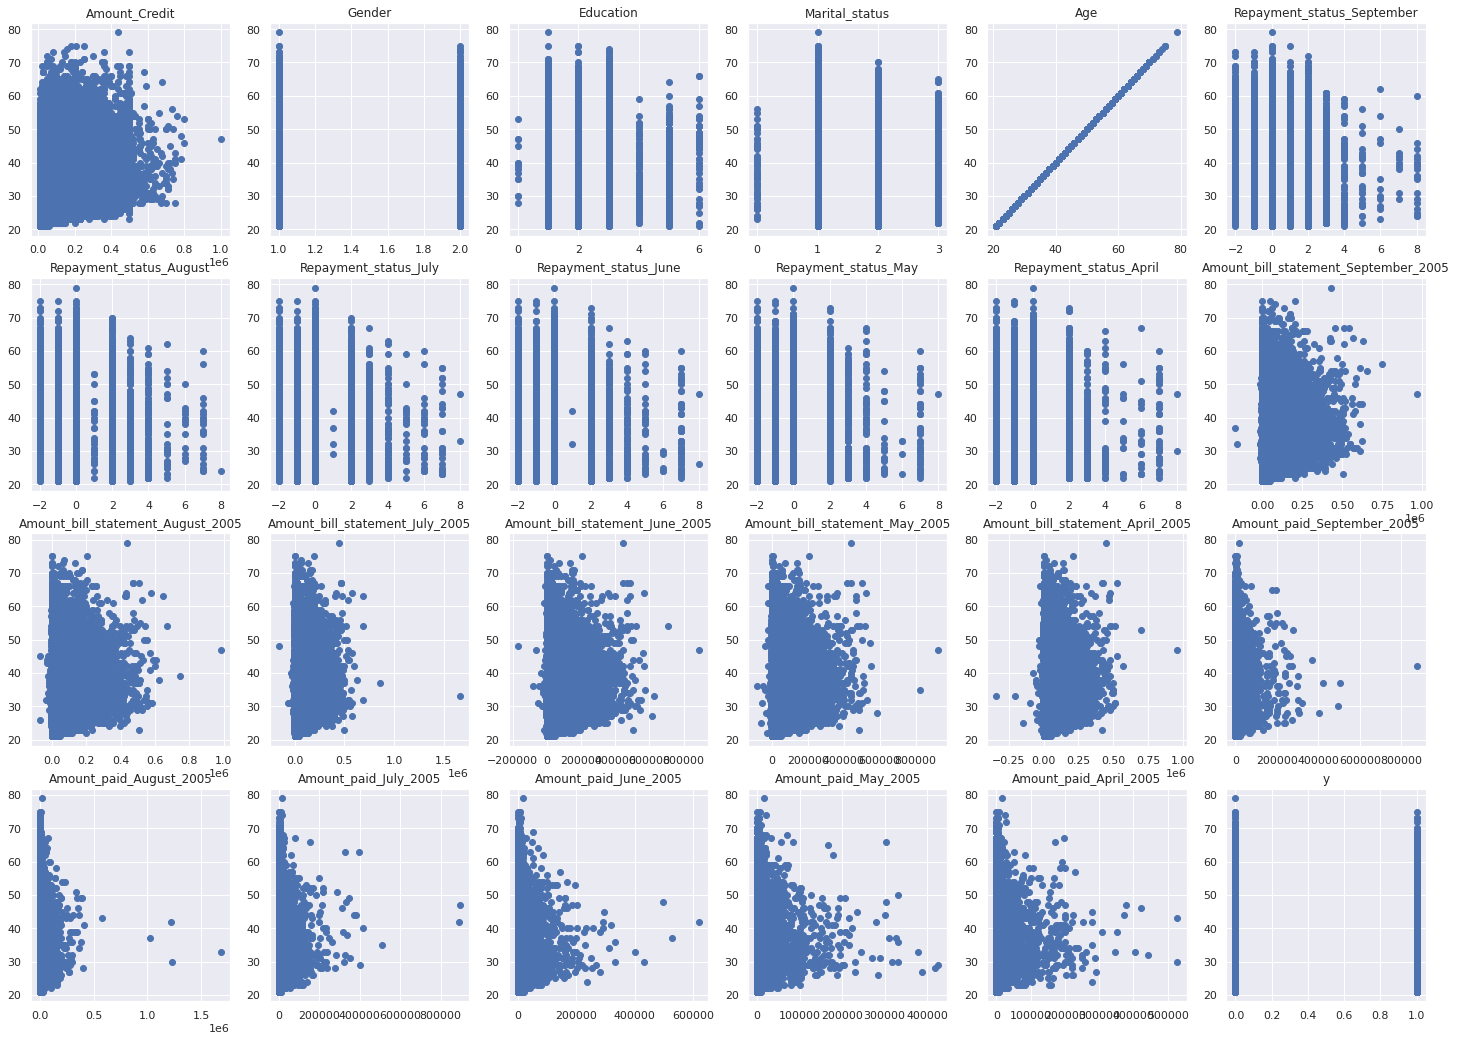

In [49]:
# Dispersion vs edad


fig, axs = plt.subplots(4, 6, figsize=(25, 18))

for i in range(0,6):
    plt.subplot(4, 6, i+1)
    plt.scatter(df[variables_all[i]], df['Age'])
    plt.title(variables_all[i])
    
    plt.subplot(4, 6, i+7)
    plt.scatter(df[variables_all[i+6]], df['Age'])
    plt.title(variables_all[i+6])
    
    plt.subplot(4, 6, i+13)
    plt.scatter(df[variables_all[i+12]], df['Age'])
    plt.title(variables_all[i+12])
    
    plt.subplot(4, 6, i+19)
    plt.scatter(df[variables_all[i+18]], df['Age'])
    plt.title(variables_all[i+18])

In [ ]:
##PairPlot
df_plot = df_tranform[variables_numericas+['y']].reset_index(drop=True)
sns.pairplot(df_plot, diag_kind="hist", hue='y')

# 10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

La primeras graficas soin de dispersion contra la edad, donde nos permite concluir que edades de 30 a 50 piden mas canidad dinero, y que los mayores de 60 años piden una menor cantidad, tambien a menor edad tiene mas frecuencia de impago, al haber mas dispersion en los categorias 8 y los impagos.

la segunda grafica nos permite ver lo disperso que se encuentran los datos, vemos que en las variables hay muchos valores atipicos, a pesar que se han tomnado un escalamiento

